In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(4747)

## Introducing, Aspects of Machine Learning

In [8]:
# df = pd.read_csv('all_coral_with_ocean_anom.csv')
df = pd.read_csv('../../data_with_temp/all_coral_with_temp_fixed_1880-2012.csv')
df = df.drop('Unnamed: 0.1', 1)
df

,Unnamed: 0,lat,lon,elevation,species,year,d18o,temp_anom
0,0,11.170000,119.150000,-4,Montastaea faveolata,1927,-4.067500,-0.405418
1,1,11.170000,119.150000,-4,Montastaea faveolata,1928,-3.865000,-0.503512
2,2,11.170000,119.150000,-4,Montastaea faveolata,1929,-3.865000,-0.819141
3,3,11.170000,119.150000,-4,Montastaea faveolata,1930,-4.007500,-0.337399
4,4,11.170000,119.150000,-4,Montastaea faveolata,1931,-4.040000,-0.099585
...,...,...,...,...,...,...,...,...
9693,16816,20.666667,296.833333,-5,Porites sp.,2008,-5.474000,0.210579
9694,16817,20.666667,296.833333,-5,Porites sp.,2009,-5.249917,0.288014
9695,16818,20.666667,296.833333,-5,Porites sp.,2010,-5.299417,0.664223
9696,16819,20.666667,296.833333,-5,Porites sp.,2011,-5.397417,0.425456


In [9]:
df = df.replace(to_replace ="Porites.sp",
                 value ="Porites sp.")
df = df.replace(to_replace ="Porites.sp",
                 value ="Porites sp.")
df = df.replace(to_replace ="Montastaea faveolata",
                 value ="Montastraea faveolata")
df = df.replace(to_replace ="Montastraea faviolata",
                 value ="Montastraea faveolata")         
df = df.replace(to_replace ="Porites australiensis",
                 value ="Porites australiensus") 
         

In [10]:
encoder_df = pd.get_dummies(df[['species']], prefix='species')
df = df.join(encoder_df)
df

,Unnamed: 0,lat,lon,elevation,species,year,d18o,temp_anom,species_Ceratoporella nicholsoni,species_Diploastrea heliopora,...,species_Platygyra lamellina,species_Porites australiensus,species_Porites lobata,species_Porites lutea,species_Porites solida,species_Porites sp.,species_Siderastrea radians,species_Siderastrea spp.,species_Sidereastrea siderea,species_Solenastrea bournoni
0,0,11.170000,119.150000,-4,Montastraea faveolata,1927,-4.067500,-0.405418,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,11.170000,119.150000,-4,Montastraea faveolata,1928,-3.865000,-0.503512,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,11.170000,119.150000,-4,Montastraea faveolata,1929,-3.865000,-0.819141,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,11.170000,119.150000,-4,Montastraea faveolata,1930,-4.007500,-0.337399,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,11.170000,119.150000,-4,Montastraea faveolata,1931,-4.040000,-0.099585,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,16816,20.666667,296.833333,-5,Porites sp.,2008,-5.474000,0.210579,0,0,...,0,0,0,0,0,1,0,0,0,0
9694,16817,20.666667,296.833333,-5,Porites sp.,2009,-5.249917,0.288014,0,0,...,0,0,0,0,0,1,0,0,0,0
9695,16818,20.666667,296.833333,-5,Porites sp.,2010,-5.299417,0.664223,0,0,...,0,0,0,0,0,1,0,0,0,0
9696,16819,20.666667,296.833333,-5,Porites sp.,2011,-5.397417,0.425456,0,0,...,0,0,0,0,0,1,0,0,0,0


As a proof of concept, let's build a little 'neural network' with all of our algae datasets. We want to predict `temp`, given `year`, `d18O`, `lat`, and `long`.

First, let's configure all the data into one big dataframe.

Then, let's scale everything between 1 and 0

In [11]:
cols_to_use = ['lat', 'lon', 'elevation', 'd18o', 'year']
cols_to_use.extend(list(encoder_df.columns))

df = df.dropna()
df = df.reset_index()
df = df.drop(columns = ['index'])
df 

X = df[cols_to_use]
Y = df['temp_anom']

In [12]:
X = X[X['year']<2021]
X = X[X['year']>1879]
X

,lat,lon,elevation,d18o,year,species_Ceratoporella nicholsoni,species_Diploastrea heliopora,species_Diploria labyrinthiformis,species_Diploria strigosa,species_Isopora sp,...,species_Platygyra lamellina,species_Porites australiensus,species_Porites lobata,species_Porites lutea,species_Porites solida,species_Porites sp.,species_Siderastrea radians,species_Siderastrea spp.,species_Sidereastrea siderea,species_Solenastrea bournoni
0,11.170000,119.150000,-4,-4.067500,1927,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.170000,119.150000,-4,-3.865000,1928,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.170000,119.150000,-4,-3.865000,1929,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.170000,119.150000,-4,-4.007500,1930,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11.170000,119.150000,-4,-4.040000,1931,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,20.666667,296.833333,-5,-5.474000,2008,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6895,20.666667,296.833333,-5,-5.249917,2009,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6896,20.666667,296.833333,-5,-5.299417,2010,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6897,20.666667,296.833333,-5,-5.397417,2011,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
X = X[X['year'].notna()]
X = X[X['year']!='-999']
X = X[X['year']!='NAN']

X = X[X['elevation'].notna()]
X = X[X['elevation']!='-999']
X = X[X['elevation']!='NAN']
X['elevation'] = X['elevation'].apply(lambda x: x.strip('m'))

X['elevation'] = X['elevation'].apply(lambda x: float(x))
X['year'] = X['year'].apply(lambda x: float(x))

In [14]:
from sklearn import preprocessing

In [15]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

cols = X.columns
d = scaler.fit_transform(X)
X_scaled = pd.DataFrame(d, columns=cols)
X_scaled.head()


,lat,lon,elevation,d18o,year,species_Ceratoporella nicholsoni,species_Diploastrea heliopora,species_Diploria labyrinthiformis,species_Diploria strigosa,species_Isopora sp,...,species_Platygyra lamellina,species_Porites australiensus,species_Porites lobata,species_Porites lutea,species_Porites solida,species_Porites sp.,species_Siderastrea radians,species_Siderastrea spp.,species_Sidereastrea siderea,species_Solenastrea bournoni
0,0.300928,-0.406596,0.819549,-0.190693,-0.293233,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.300928,-0.406596,0.819549,-0.151509,-0.278195,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.300928,-0.406596,0.819549,-0.151509,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0.300928,-0.406596,0.819549,-0.179083,-0.248120,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.300928,-0.406596,0.819549,-0.185372,-0.233083,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [16]:
Y = Y.reset_index()
Y = Y.drop(columns = ['index'])
Y 

,temp_anom
0,-0.405418
1,-0.503512
2,-0.819141
3,-0.337399
4,-0.099585
...,...
6894,0.210579
6895,0.288014
6896,0.664223
6897,0.425456


In [17]:
# import random
# num_test = len(X_scaled.index) * 0.20
# test_indices = random.sample(range(0, 6898), int(num_test))
# test_indices[:5]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=47)

In [599]:
# X_val_and_test, Y_val_and_test = X_scaled.iloc[test_indices], Y.iloc[test_indices]

In [19]:
X_val_and_test.shape, Y_val_and_test.shape

((1380, 25), (1380, 1))

In [20]:
X_val_and_test.index, Y_val_and_test.index

(Int64Index([5947, 1631,  561, 3379, 6791,  206, 3720, 1892,  450, 4253,
             ...
             4061,   62, 2535, 4586, 3147,   76, 3310, 4506, 3076, 5747],
            dtype='int64', length=1380),
 Int64Index([5947, 1631,  561, 3379, 6791,  206, 3720, 1892,  450, 4253,
             ...
             4061,   62, 2535, 4586, 3147,   76, 3310, 4506, 3076, 5747],
            dtype='int64', length=1380))

In [21]:
X_train.shape, Y_train.shape

((5519, 25), (5519, 1))

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU

In [23]:
from numpy.random import seed
seed(47)

In [24]:
model = Sequential([
    Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_shape=(25,), kernel_initializer='normal'),
    #kernel_initializer='normal'
#    Dense(32, activation='relu', input_shape=(5,)),
#      Dense(32, activation='relu'),
#      Dense(16, activation='relu'),
#      Dense(16, activation='relu'),
#      Dense(16, activation='relu'),
    Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
])

In [25]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        'MeanSquaredError',
    ]
)

In [26]:
X_train_arr = X_train.to_numpy
Y_train_arr = Y_train.to_numpy
X_val_and_test_arr = X_val_and_test.to_numpy
Y_val_and_test_arr = Y_val_and_test.to_numpy

In [27]:
X_train.size

137975

In [28]:
Y_train.size

5519

In [29]:
import random
random.seed(4747)

In [30]:
seed(4747)

hist = model.fit(X_train, Y_train,
          batch_size=16, epochs=64,
          validation_data=(X_val_and_test, Y_val_and_test))

Epoch 1/64
345/345 [==============================] - 1s 1ms/step - loss: 0.1544 - mean_squared_error: 0.1544 - val_loss: 0.1249 - val_mean_squared_error: 0.1249
Epoch 2/64
345/345 [==============================] - 0s 958us/step - loss: 0.1267 - mean_squared_error: 0.1267 - val_loss: 0.1164 - val_mean_squared_error: 0.1164
Epoch 3/64
345/345 [==============================] - 0s 838us/step - loss: 0.1247 - mean_squared_error: 0.1247 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 4/64
345/345 [==============================] - 0s 849us/step - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 5/64
345/345 [==============================] - 0s 807us/step - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.1194 - val_mean_squared_error: 0.1194
Epoch 6/64
345/345 [==============================] - 0s 789us/step - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.1134 - val_mean_squared_error: 0.1134
Epoch 7/64
345/345

In [612]:
model.evaluate(X_val_and_test, Y_val_and_test)

44/44 [==============================] - 0s 503us/step - loss: 0.1050 - mean_squared_error: 0.1050


[0.10498158633708954, 0.10498158633708954]

This Sequential Neural Network Model produced an MSE of 0.1040

In [31]:
import matplotlib.pyplot as plt

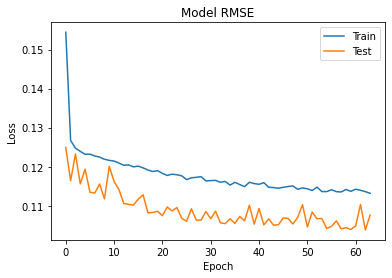

In [32]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Let's try to visualize this on a time series plot

In [33]:
actual = pd.DataFrame(Y_val_and_test, columns=["temp_anom"])
actual

,temp_anom
5947,-0.123288
1631,-0.467197
561,-0.482571
3379,-0.169365
6791,-0.357380
...,...
76,-1.140522
3310,0.042168
4506,-0.606056
3076,-0.476815


In [34]:
predicted = pd.DataFrame(model.predict(X_val_and_test), columns=["pred"])
predicted

,pred
0,-0.312315
1,-0.715728
2,-0.170316
3,-0.171697
4,-0.436824
...,...
1375,-0.824377
1376,-0.201269
1377,-0.725833
1378,-0.434653


In [35]:
type(model.predict(X_val_and_test))

numpy.ndarray

In [36]:
actual.size, predicted.size

(1380, 1380)

In [37]:
predicted['index'] = actual.index
predicted = predicted.set_index(['index'])
predicted

,pred
index,
5947,-0.312315
1631,-0.715728
561,-0.170316
3379,-0.171697
6791,-0.436824
...,...
76,-0.824377
3310,-0.201269
4506,-0.725833


In [38]:
actual_v_pred = pd.concat([actual, predicted], axis=1)
#actual_v_pred['pred_altered'] = actual_v_pred['pred'].apply(lambda x: (((x-1)/2)**2)*5)
actual_v_pred

,temp_anom,pred
5947,-0.123288,-0.312315
1631,-0.467197,-0.715728
561,-0.482571,-0.170316
3379,-0.169365,-0.171697
6791,-0.357380,-0.436824
...,...,...
76,-1.140522,-0.824377
3310,0.042168,-0.201269
4506,-0.606056,-0.725833
3076,-0.476815,-0.434653


In [39]:
actual_v_pred_w_year = actual_v_pred.join(X_val_and_test)
actual_v_pred_w_year

,temp_anom,pred,lat,lon,elevation,d18o,year,species_Ceratoporella nicholsoni,species_Diploastrea heliopora,species_Diploria labyrinthiformis,...,species_Platygyra lamellina,species_Porites australiensus,species_Porites lobata,species_Porites lutea,species_Porites solida,species_Porites sp.,species_Siderastrea radians,species_Siderastrea spp.,species_Sidereastrea siderea,species_Solenastrea bournoni
5947,-0.123288,-0.312315,-0.082145,0.922487,0.669173,-0.326030,0.413534,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1631,-0.467197,-0.715728,-1.000000,0.616469,0.804511,-0.176876,-0.548872,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
561,-0.482571,-0.170316,0.740351,-0.527069,0.819549,-0.149768,0.443609,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3379,-0.169365,-0.171697,0.461590,-0.559518,0.789474,-0.171545,0.413534,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6791,-0.357380,-0.436824,0.126953,-0.999982,0.729323,-0.358714,-0.157895,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-1.140522,-0.824377,0.984681,-0.425052,0.639098,-0.127515,-0.819549,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3310,0.042168,-0.201269,0.502376,-0.564499,0.792481,-0.159088,0.353383,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4506,-0.606056,-0.725833,0.457505,0.922722,1.000000,-0.304534,-0.338346,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3076,-0.476815,-0.434653,0.458754,-0.556789,0.796992,-0.185924,-0.218045,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


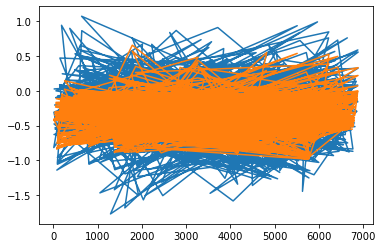

In [40]:
plt.plot(actual_v_pred)

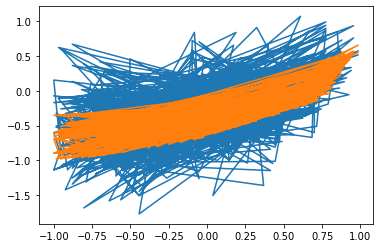

In [41]:
plt.plot(actual_v_pred_w_year['year'], actual_v_pred_w_year['temp_anom'])
plt.plot(actual_v_pred_w_year['year'], actual_v_pred_w_year['pred'])

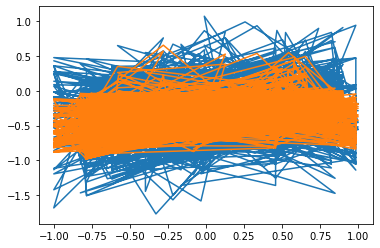

In [42]:
plt.plot(actual_v_pred_w_year['lat'], actual_v_pred_w_year['temp_anom'])
plt.plot(actual_v_pred_w_year['lat'], actual_v_pred_w_year['pred'])

In [43]:
import numpy as np
np.corrcoef(actual_v_pred['temp_anom'], actual_v_pred['pred'])

array([[1.        , 0.61537302],
       [0.61537302, 1.        ]])

In [44]:
from scipy.stats import pearsonr

pearsonr(actual_v_pred['temp_anom'], actual_v_pred['pred'])

(0.615373024540981, 1.3643989887811093e-144)

This says that the two variables have a correlation of 0.6199 and a p-value of basically 0. 

In [46]:
model.evaluate(X_train, Y_train)#, mean_squared_error(actual_v_pred['temp_anom'], actual_v_pred['pred'])

173/173 [==============================] - 0s 1ms/step - loss: 0.1142 - mean_squared_error: 0.1142


[0.11418572068214417, 0.11418572068214417]

### Let's try a 'regular' multiple linear regression model:

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(X_train, Y_train)
preds_linear = pd.DataFrame(model.predict(X_val_and_test), columns=["pred"])
#print("Loss: " + str(loss(rounded_preds, test_labels)))

In [49]:
actual_v_pred_linear = actual.join(preds_linear, how = "inner")
actual_v_pred_linear['diff'] = actual_v_pred_linear['temp_anom'] - actual_v_pred_linear['pred']
actual_v_pred_linear.head()

,temp_anom,pred,diff
561,-0.482571,-0.118511,-0.364060
206,0.054097,-0.068323,0.122421
450,-0.482571,-0.577130,0.094559
589,0.588653,0.059445,0.529209
713,-0.446479,0.023057,-0.469536


In [50]:
from sklearn.metrics import mean_squared_error
model.score(X_train, Y_train), mean_squared_error(Y_val_and_test, preds_linear)

(0.30240338003320555, 0.11875368572423768)

Here we see that the LinearRegression model produced a `score` of 0.302 and a MSE of 0.119.

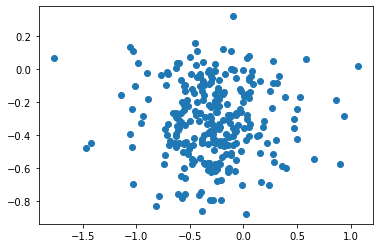

In [51]:
plt.scatter(actual_v_pred_linear['temp_anom'], actual_v_pred_linear['pred'])

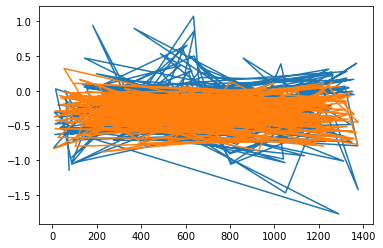

In [52]:
plt.plot(actual_v_pred_linear['temp_anom'])
plt.plot(actual_v_pred_linear['pred'])

In [53]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [-0.43254407]
Coefficients: 
 [[ 1.03723777e-01 -5.85672780e-02  1.11134722e-01 -1.68625484e-02
   4.16080245e-01  5.37910372e-02  3.82818017e-02 -9.88129135e-02
  -3.45897176e-02 -2.77555756e-17 -4.29433768e-03 -6.15376935e-03
   1.31201363e-01 -2.31885494e-02 -8.58069781e-02  2.60208521e-17
  -4.48318929e-02  3.48827400e-02  6.40274398e-03 -6.93889390e-18
   4.41966020e-02  4.48942367e-02  3.73710055e-03 -4.34449129e-02
  -1.62645538e-02]]


If we assign the coefficients to their respective input features (`year`, `d18O`, `lat`, `long`, `depth`) it is weird to observe that latitude, longitude, and depth had the 'largest' impact on the output `temp` variable -- far more than `d18O`!

Looking at this is one of the many benefits of using a LinReg Model, we are able to see what the model finds important (versus a NN where a lot is hidden).

<!-- Perhaps as expected, the model was able to discern that the d18O was the most important factor in determining the predicted temperature. This is seen by the second coefficient in the model (relating to d18O) being the largest number. It appears as tho the other coefficients (relating to year, lat, long, and depth) are extraordinarily tiny comparatively. -->

## Sequential Neural Network

Okay.. so linear regression seemed to do the trick for these organisms really damn well. Let's see if we can recreate this with a Sequential Neural Network (aka: a sequence of linear combinations as a result of matrix operations). We will be using the LeakyReLU activation function ( a linear function )

In [635]:
network = Sequential()
network.add(Dense(8, input_shape=(25,), activation='LeakyReLU'))
network.add(Dense(6, activation='LeakyReLU'))
network.add(Dense(6, activation='LeakyReLU'))
network.add(Dense(4, activation='LeakyReLU'))
network.add(Dense(1, activation='LeakyReLU'))

network.compile('adam', loss='mse', metrics=['mse'])
network.fit(X_train, Y_train, epochs=200)

Epoch 1/200
173/173 [==============================] - 1s 1ms/step - loss: 0.3616 - mse: 0.3616
Epoch 2/200
173/173 [==============================] - 0s 888us/step - loss: 0.1834 - mse: 0.1834
Epoch 3/200
173/173 [==============================] - 0s 775us/step - loss: 0.1624 - mse: 0.1624
Epoch 4/200
173/173 [==============================] - 0s 727us/step - loss: 0.1514 - mse: 0.1514
Epoch 5/200
173/173 [==============================] - 0s 691us/step - loss: 0.1412 - mse: 0.1412
Epoch 6/200
173/173 [==============================] - 0s 711us/step - loss: 0.1346 - mse: 0.1346
Epoch 7/200
173/173 [==============================] - 0s 644us/step - loss: 0.1319 - mse: 0.1319
Epoch 8/200
173/173 [==============================] - 0s 800us/step - loss: 0.1301 - mse: 0.1301
Epoch 9/200
173/173 [==============================] - 0s 755us/step - loss: 0.1286 - mse: 0.1286
Epoch 10/200
173/173 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260
Epoch 11/200
173/173 [=

In [636]:
predicted = pd.DataFrame(network.predict(X_val_and_test), columns=["pred"])
predicted.head()

,pred
0,-0.219524
1,-0.610726
2,-0.171483
3,-0.046177
4,-0.373609


In [637]:
predicted['index'] = actual.index
predicted = predicted.set_index(['index'])
predicted['index'] = actual.index
predicted = predicted.set_index(['index'])
predicted

,pred
index,
5947,-0.219524
1631,-0.610726
561,-0.171483
3379,-0.046177
6791,-0.373609
...,...
76,-0.833454
3310,-0.121208
4506,-0.674335


In [638]:
actual_v_pred = actual.join(predicted, how = "inner")
actual_v_pred

,temp_anom,pred
5947,-0.123288,-0.219524
1631,-0.467197,-0.610726
561,-0.482571,-0.171483
3379,-0.169365,-0.046177
6791,-0.357380,-0.373609
...,...,...
76,-1.140522,-0.833454
3310,0.042168,-0.121208
4506,-0.606056,-0.674335
3076,-0.476815,-0.430305


In [639]:
mean_squared_error(Y_val_and_test, predicted)

0.10284192739689275

This different (more hidden layers, more epochs) NN produced a MSE of 0.1040 -- which is marginally better than the Linear Regression model above (0.33), and much better than the first Sequential NN Model which only had 1 layer (0.44). )

In [640]:
actual = pd.DataFrame(Y_val_and_test, columns=["temp_anom"])
actual

,temp_anom
5947,-0.123288
1631,-0.467197
561,-0.482571
3379,-0.169365
6791,-0.357380
...,...
76,-1.140522
3310,0.042168
4506,-0.606056
3076,-0.476815


In [641]:
test_data_with_preds = actual_v_pred.join(X_val_and_test, how = "inner")
test_data_with_preds['diff'] = test_data_with_preds['temp_anom'] - test_data_with_preds['pred']
test_data_with_preds

,temp_anom,pred,lat,lon,elevation,d18o,year,species_Ceratoporella nicholsoni,species_Diploastrea heliopora,species_Diploria labyrinthiformis,...,species_Porites australiensus,species_Porites lobata,species_Porites lutea,species_Porites solida,species_Porites sp.,species_Siderastrea radians,species_Siderastrea spp.,species_Sidereastrea siderea,species_Solenastrea bournoni,diff
5947,-0.123288,-0.219524,-0.082145,0.922487,0.669173,-0.326030,0.413534,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.096235
1631,-0.467197,-0.610726,-1.000000,0.616469,0.804511,-0.176876,-0.548872,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.143529
561,-0.482571,-0.171483,0.740351,-0.527069,0.819549,-0.149768,0.443609,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.311088
3379,-0.169365,-0.046177,0.461590,-0.559518,0.789474,-0.171545,0.413534,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.123188
6791,-0.357380,-0.373609,0.126953,-0.999982,0.729323,-0.358714,-0.157895,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.016229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-1.140522,-0.833454,0.984681,-0.425052,0.639098,-0.127515,-0.819549,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.307068
3310,0.042168,-0.121208,0.502376,-0.564499,0.792481,-0.159088,0.353383,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.163376
4506,-0.606056,-0.674335,0.457505,0.922722,1.000000,-0.304534,-0.338346,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.068279
3076,-0.476815,-0.430305,0.458754,-0.556789,0.796992,-0.185924,-0.218045,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.046511


Text(0, 0.5, 'Predicted')

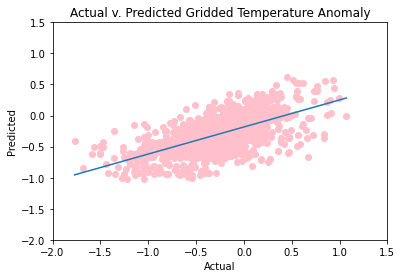

In [642]:
x = test_data_with_preds['temp_anom']
y = test_data_with_preds['pred']
plt.scatter(test_data_with_preds['temp_anom'], test_data_with_preds['pred'], color="pink")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlim([-2, 1.5])
plt.ylim([-2, 1.5])
plt.title('Actual v. Predicted Gridded Temperature Anomaly')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Temp Error')

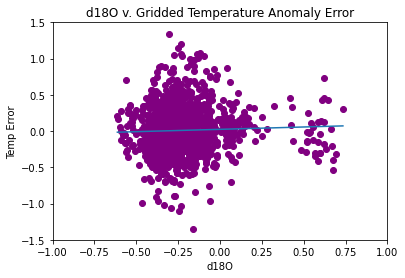

In [643]:
x = test_data_with_preds['d18o']
y = test_data_with_preds['diff']
plt.scatter(test_data_with_preds['d18o'], test_data_with_preds['diff'], color="purple")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlim([-1, 1])
plt.ylim([-1.5, 1.5])
plt.title('d18O v. Gridded Temperature Anomaly Error')
plt.xlabel('d18O')
plt.ylabel('Temp Error')

The model performed worse as the 

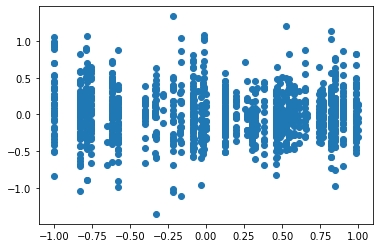

In [644]:
plt.scatter(test_data_with_preds['lat'], test_data_with_preds['diff'])

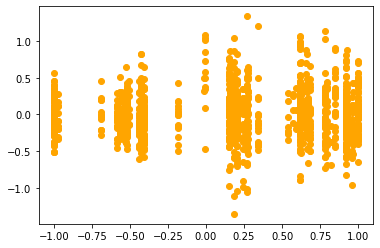

In [645]:
plt.scatter(test_data_with_preds['lon'], test_data_with_preds['diff'], color="orange")

Let's now take all of our predictions, average them by year

<AxesSubplot:>

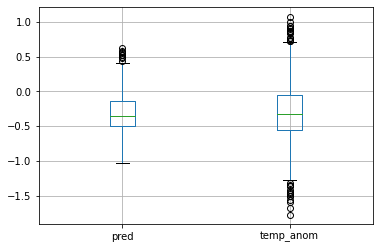

In [646]:
test_data_with_preds.boxplot(column = ['pred', 'temp_anom'])

In [652]:
annual_temp_and_preds = test_data_with_preds[['temp_anom', 'pred']].join(X, how="inner")
annual_compare = annual_temp_and_preds.groupby('year', as_index=False)['temp_anom', 'pred'].mean()
annual_compare

<ipython-input-652-af0eea017a12>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  annual_compare = annual_temp_and_preds.groupby('year', as_index=False)['temp_anom', 'pred'].mean()


,year,temp_anom,pred
0,1880.0,-0.493587,-0.545769
1,1881.0,-0.429921,-0.728238
2,1882.0,-0.251476,-0.449980
3,1883.0,-0.609376,-0.634480
4,1884.0,-0.566216,-0.557992
...,...,...,...
127,2007.0,0.186319,0.350399
128,2008.0,-0.056670,0.360611
129,2009.0,0.313974,0.433042
130,2010.0,0.847704,0.522755


([<matplotlib.lines.Line2D at 0x7ffcb618adf0>],
 [<matplotlib.lines.Line2D at 0x7ffcb618ad00>])

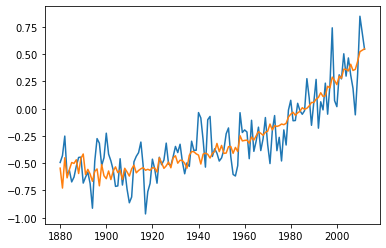

In [657]:
plt.plot(annual_compare['year'], annual_compare['temp_anom']), plt.plot(annual_compare['year'], annual_compare['pred'])

Sweet --- looks like we've at least followed the general trend of global warming :)

In [662]:
np.corrcoef(annual_compare['temp_anom'], annual_compare['pred'])

array([[1.        , 0.86019714],
       [0.86019714, 1.        ]])

In [665]:
np.var(annual_compare['temp_anom']), np.var(annual_compare['pred'])

(0.11196148409080801, 0.09695577621459961)

We should note that our predictions do not vary as much as the actual values.